In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
df = pd.read_csv('train.csv')
df

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg
0,0,2022-12-19,196,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy,28.946465
1,1,2023-11-21,244,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt,51.549053
2,4,2022-02-01,148,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt,53.008323
3,5,2023-03-19,157,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt,48.621527
4,6,2022-07-18,297,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT,44.156984
...,...,...,...,...,...,...,...,...,...,...,...,...
906,1044,2022-03-29,395,18,17.354199,45.138435,1,0,40.550668,Intermediate,GRAINS,50.369152
907,1045,2022-11-27,483,11,24.912137,59.485091,6,0,36.470276,intermediate,dairy,43.070121
908,1046,2023-04-12,243,11,28.870945,70.508404,2,0,19.767203,Intermediate,MeAt,29.632560
909,1048,2022-02-14,406,10,19.061638,55.286642,0,0,28.560361,EXPERT,MEAT,44.615759


**dropping unnecessary columns**

In [4]:
df = df.drop(["ID", "date"], axis=1)
df

,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg
0,196,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy,28.946465
1,244,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt,51.549053
2,148,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt,53.008323
3,157,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt,48.621527
4,297,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT,44.156984
...,...,...,...,...,...,...,...,...,...,...
906,395,18,17.354199,45.138435,1,0,40.550668,Intermediate,GRAINS,50.369152
907,483,11,24.912137,59.485091,6,0,36.470276,intermediate,dairy,43.070121
908,243,11,28.870945,70.508404,2,0,19.767203,Intermediate,MeAt,29.632560
909,406,10,19.061638,55.286642,0,0,28.560361,EXPERT,MEAT,44.615759


#Data Exploration

In [5]:
print(df.isna().sum())
print(df.dtypes)

meals_served          0
kitchen_staff         0
temperature_C         0
humidity_percent      0
day_of_week           0
special_event         0
past_waste_kg         0
staff_experience    164
waste_category        0
food_waste_kg         0
dtype: int64
meals_served          int64
kitchen_staff         int64
temperature_C       float64
humidity_percent    float64
day_of_week           int64
special_event         int64
past_waste_kg       float64
staff_experience     object
waste_category       object
food_waste_kg       float64
dtype: object


In [6]:
df.describe()

,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,food_waste_kg
count,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000
mean,375.405049,11.900110,22.189280,60.761313,3.014270,0.085620,27.015691,44.842691
std,502.812717,4.285153,8.922389,17.330821,2.009542,0.279956,12.774223,27.934366
min,100.000000,5.000000,-10.372207,30.121111,0.000000,0.000000,5.008394,10.819048
25%,211.000000,8.000000,15.684585,46.017835,1.000000,0.000000,16.091383,32.887912
50%,306.000000,12.000000,22.115040,61.633960,3.000000,0.000000,26.854109,41.146930
75%,407.000000,15.000000,28.804294,75.787910,5.000000,0.000000,38.149878,50.046681
max,4730.000000,19.000000,60.000000,89.982828,6.000000,1.000000,49.803703,274.328783


In [7]:
print(df.nunique())
print('------------------')
print(df.duplicated().sum())

meals_served        373
kitchen_staff        15
temperature_C       892
humidity_percent    867
day_of_week           7
special_event         2
past_waste_kg       867
staff_experience      4
waste_category        5
food_waste_kg       867
dtype: int64
------------------
0


In [8]:
print(df['staff_experience'].unique())
print(df['day_of_week'].unique())
print(df['special_event'].unique())
print(df['waste_category'].unique())

['intermediate' nan 'Beginner' 'Intermediate' 'EXPERT']
[0 1 6 3 5 4 2]
[0 1]
['dairy' 'MeAt' 'MEAT' 'Vegetables' 'GRAINS']


In [9]:
str_cols_to_fix = ['waste_category', 'staff_experience']

for col in str_cols_to_fix:
  df[col] = df[col].str.strip().str.lower()

# data visualization & dealing with outliers


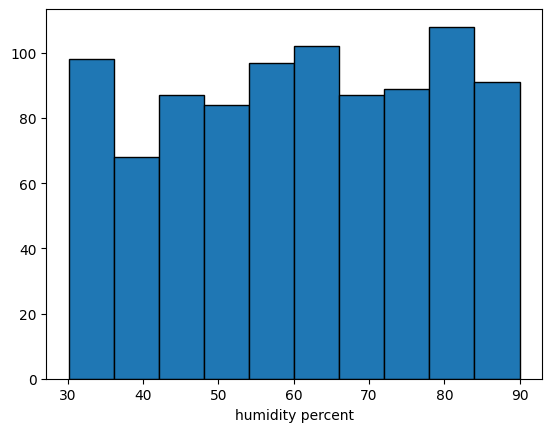

In [10]:
plt.hist(df['humidity_percent'], edgecolor='k')
plt.xlabel('humidity percent')
plt.show()

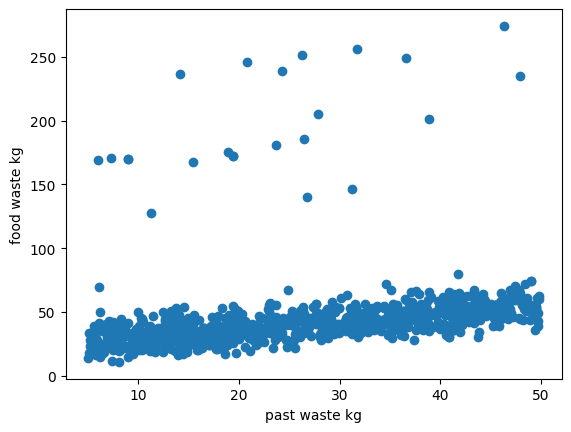

In [11]:
plt.scatter(df['past_waste_kg'], df['food_waste_kg'])

plt.xlabel('past waste kg')
plt.ylabel('food waste kg')
plt.show()

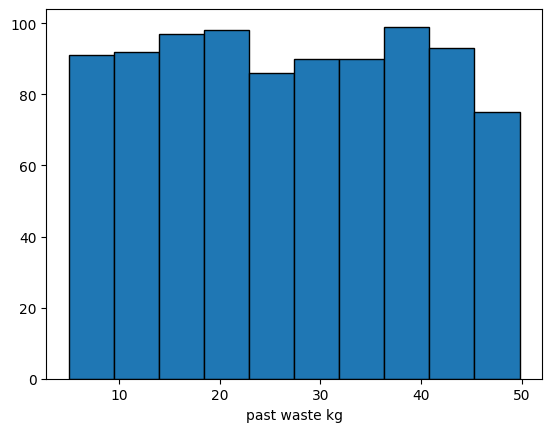

In [12]:
plt.hist(df['past_waste_kg'], edgecolor='k')
plt.xlabel('past waste kg')
plt.show()

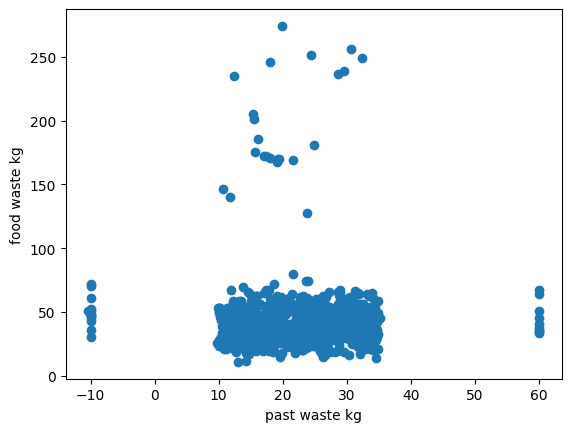

In [13]:
plt.scatter(df['temperature_C'], df['food_waste_kg'])

plt.xlabel('past waste kg')
plt.ylabel('food waste kg')
plt.show()

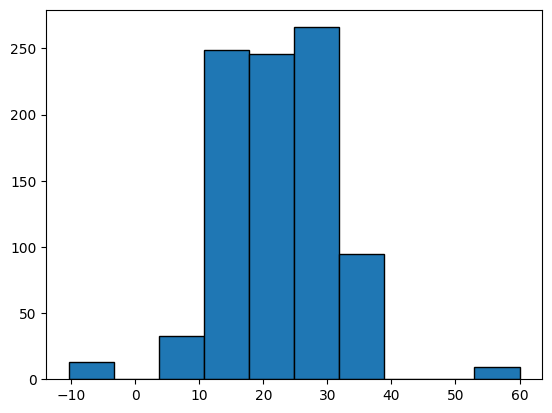

In [14]:
plt.hist(df['temperature_C'], edgecolor='k')
plt.show()

**using IQR to detect outliers**

In [15]:
Q1 = df.temperature_C.quantile(0.25)
Q3 = df.temperature_C.quantile(0.75)

IQR = Q3-Q1
IQR

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [16]:
df['temperature_C'] = df['temperature_C'].apply(lambda x: np.nan if x<lower_limit or x>upper_limit else x)


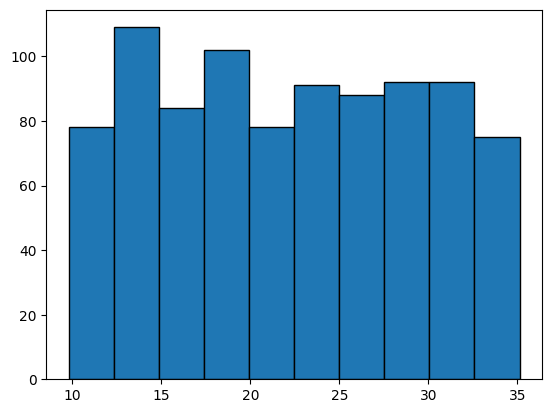

In [17]:
plt.hist(df['temperature_C'], edgecolor='k')
plt.show()

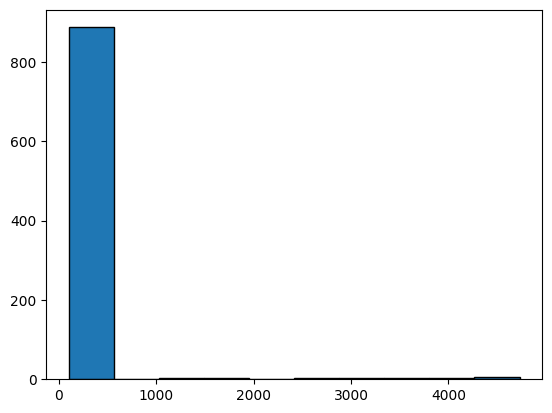

In [18]:
plt.hist(df['meals_served'], edgecolor='k')
plt.show()

In [19]:
Q1 = df.meals_served.quantile(0.25)
Q3 = df.meals_served.quantile(0.75)

IQR = Q3-Q1
IQR

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

df = df[(df['meals_served'] > lower_limit) & (df['meals_served'] < upper_limit)]

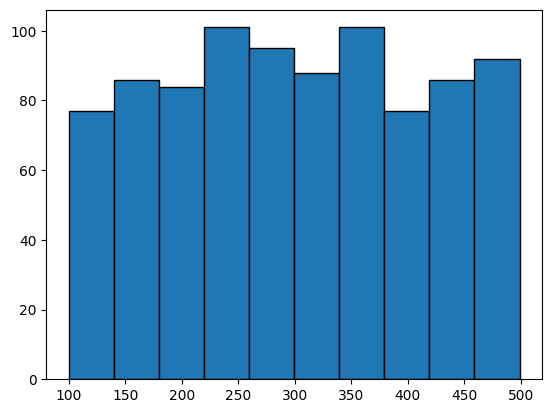

In [20]:
plt.hist(df['meals_served'], edgecolor='k')
plt.show()

# Data Preprocessing

In [21]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
cat_cols = ['day_of_week', 'special_event', 'waste_category']
num_cols = ['meals_served', 'kitchen_staff', 'temperature_C', 'humidity_percent', 'past_waste_kg']
ord_cols  = ['staff_experience']

In [23]:
num_pipeline = Pipeline(steps = [
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', StandardScaler())
])

In [24]:
cat_pipeline = Pipeline(steps = [
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot-encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [25]:
ordinal_pipeline = Pipeline(steps=[
    ('impute_missing', SimpleImputer(strategy='most_frequent')),
    ('encode', OrdinalEncoder(
        categories= [['beginner', 'intermediate', 'expert']],
        handle_unknown='use_encoded_value',
        unknown_value=np.nan
    )),
    ('impute_unknowns', SimpleImputer(strategy='most_frequent'))
])

In [26]:
col_transformer = ColumnTransformer(transformers= [
    ('num_pipeline', num_pipeline, num_cols),
    ('cat_pipeline', cat_pipeline, cat_cols),
    ('ordinal_pipeline', ordinal_pipeline, ord_cols)
],remainder='drop',n_jobs=-1)

# Modeling

In [27]:
rfr = RandomForestRegressor()
lr = LinearRegression()
svr = SVR()

In [28]:
rfr_pipe = Pipeline([
    ("prep", col_transformer),
    ("model", rfr)
])

lr_pipe = Pipeline([
    ("prep", col_transformer),
    ("model", lr)
])

svr_pipe = Pipeline([
    ("prep", col_transformer),
    ("model", svr)
])

param_grid_rfr = {
    "model__n_estimators": [100, 500],
    "model__max_depth": [None, 10, 20, 30]
}

param_grid_svr = {
    "model__kernel": ["linear", "rbf"],
    "model__C": [0.1, 1, 10, 100],
    "model__epsilon": [0.01, 0.1, 0.5, 1.0]
}

In [29]:
lr_pipe.fit(x_train, y_train)
lr_r2 = lr_pipe.score(x_test, y_test)
print("LinearRegression R²:", lr_r2)

LinearRegression R²: 0.779194287777096


In [30]:
svr_cv= GridSearchCV(svr_pipe, param_grid_svr, cv=5, scoring="r2", n_jobs=-1)
svr_cv.fit(x_train, y_train)
print("Best svr R²:", svr_cv.best_score_)

Best svr R²: 0.8117959269614632


In [31]:
rfr_cv= GridSearchCV(rfr_pipe, param_grid_rfr, cv=5, scoring="r2", n_jobs=-1)
rfr_cv.fit(x_train, y_train)
print("Best rfc R²:", rfr_cv.best_score_)

Best rfc R²: 0.7798187924022797


support vector regression brings the best results, tuning hyperparameters further

In [32]:
svr_cv_r2 = svr_cv.best_estimator_.score(x_test, y_test)
print("svr Test R²:", svr_cv_r2)

svr Test R²: 0.777388706619024


In [33]:
param_grid_svr = {
    "model__kernel": ["linear", "rbf", "poly", "sigmoid"],
    "model__C": [0.1, 1, 10, 100],
    "model__epsilon": [0.01, 0.1, 0.5, 1.0],
    "model__gamma": ["scale", "auto", 0.01, 0.1],
}
svr_cv= GridSearchCV(svr_pipe, param_grid_svr, cv=5, scoring="r2", n_jobs=-1)
svr_cv.fit(x_train, y_train)
print("Best svr R²:", svr_cv.best_score_)

svr_cv_r2 = svr_cv.best_estimator_.score(x_test, y_test)
print("svr Test R²:", svr_cv_r2)

Best svr R²: 0.8117959269614632
svr Test R²: 0.777388706619024


(further tuning didnt help)

checking MAE and RMSE scores

In [34]:
y_pred_svr = svr_cv.predict(x_test)
svr_mae = mean_absolute_error(y_test, y_pred_svr)
print("SVR Test MAE:", svr_mae)

svr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_svr))
print("SVR Test RMSE:", svr_rmse)

SVR Test MAE: 4.219990201339019
SVR Test RMSE: 5.14579683226807
